In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [43]:
image_size=256
batch_size=32
epoch=10
channels=3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plant village",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [27]:
class_name=dataset.class_names

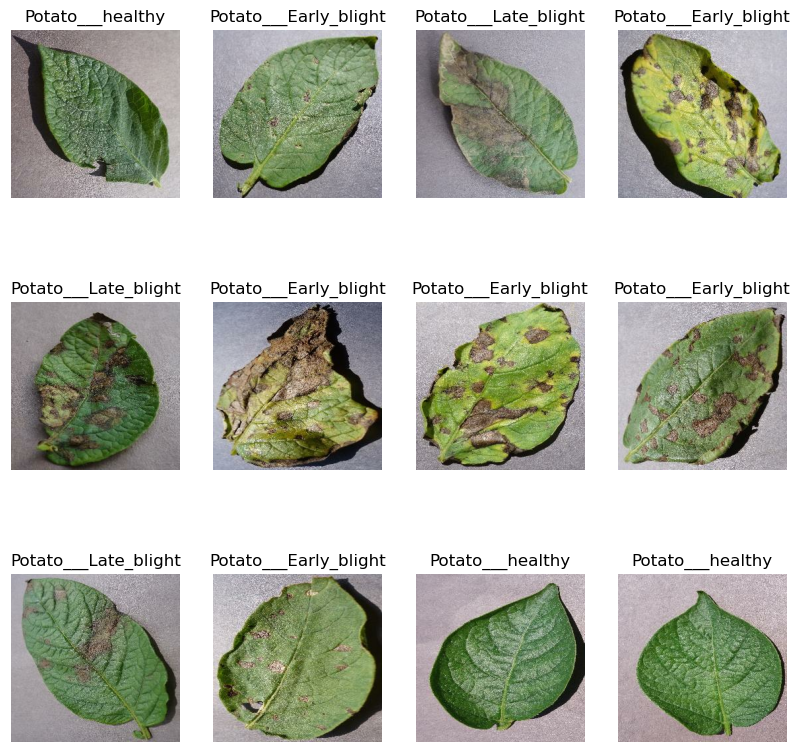

In [5]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [6]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [7]:
tran_ds=dataset.take(54)
test_ds=dataset.skip(54)
len(tran_ds),len(test_ds)

(54, 14)

In [8]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [9]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)
len(val_ds),len(test_ds)

(6, 8)

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [14]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



In [16]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
                                                                 
=================================================================
Total params: 183747 (717.76 KB)
Trainable params: 183747 (717.76 KB)
Non-trainable params: 0 (0.00 Byte)
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
54/54 [==============================] - 1191s 21s/step - loss: 0.9008 - accuracy: 0.4664 - val_loss: 0.8163 - val_accuracy: 0.5156
Epoch 2/10
54/54 [==============================] - 1026s 19s/step - loss: 0.7657 - accuracy: 0.6221 - val_loss: 0.6912 - val_accuracy: 0.6510
Epoch 3/10
54/54 [==============================] - 805s 15s/step - loss: 0.5504 - accuracy: 0.7396 - val_loss: 0.7141 - val_accuracy: 0.7135
Epoch 4/10
54/54 [==============================] - 804s 15s/step - loss: 0.4398 - accuracy: 0.8067 - val_loss: 0.3428 - val_accuracy: 0.8542
Epoch 5/10
54/54 [==============================] - 873s 16s/step - loss: 0.3306 - accuracy: 0.8519 - val_loss: 0.2160 - val_accuracy: 0.9062
Epoch 6/10
54/54 [==============================] - 851s 16s/step - loss: 0.2583 - accuracy: 0.8964 - val_loss: 0.2701 - val_accuracy: 0.8698
Epoch 7/10
54/54 [==============================] - 841s 16s/step - loss: 0.2260 - accuracy: 0.9149 - val_loss: 0.3765 - val_accuracy: 0.8906
Epoc

In [20]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 139s 9s/step - loss: 0.1643 - accuracy: 0.9180


In [21]:
scores

[0.1643400639295578, 0.91796875]

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

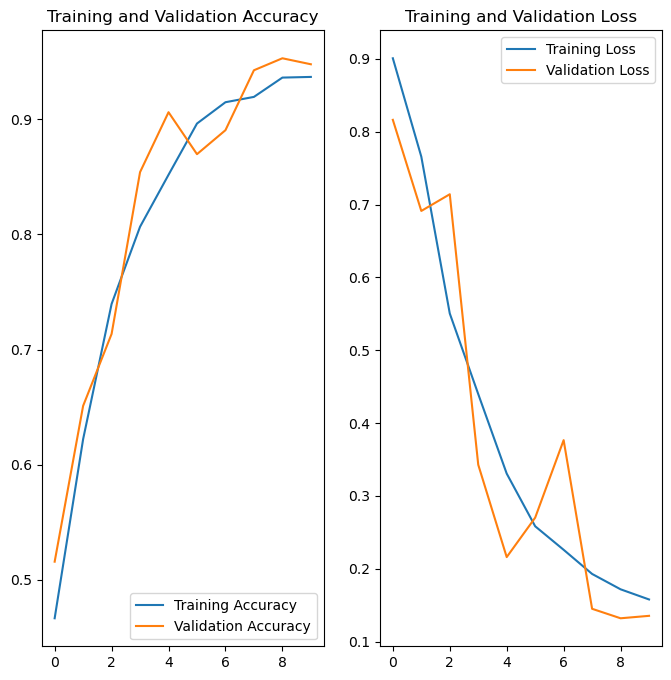

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 36s 36s/step
predicted label: Potato___Late_blight


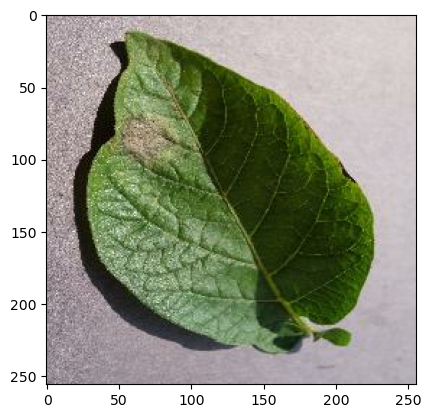

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 1s 581ms/step


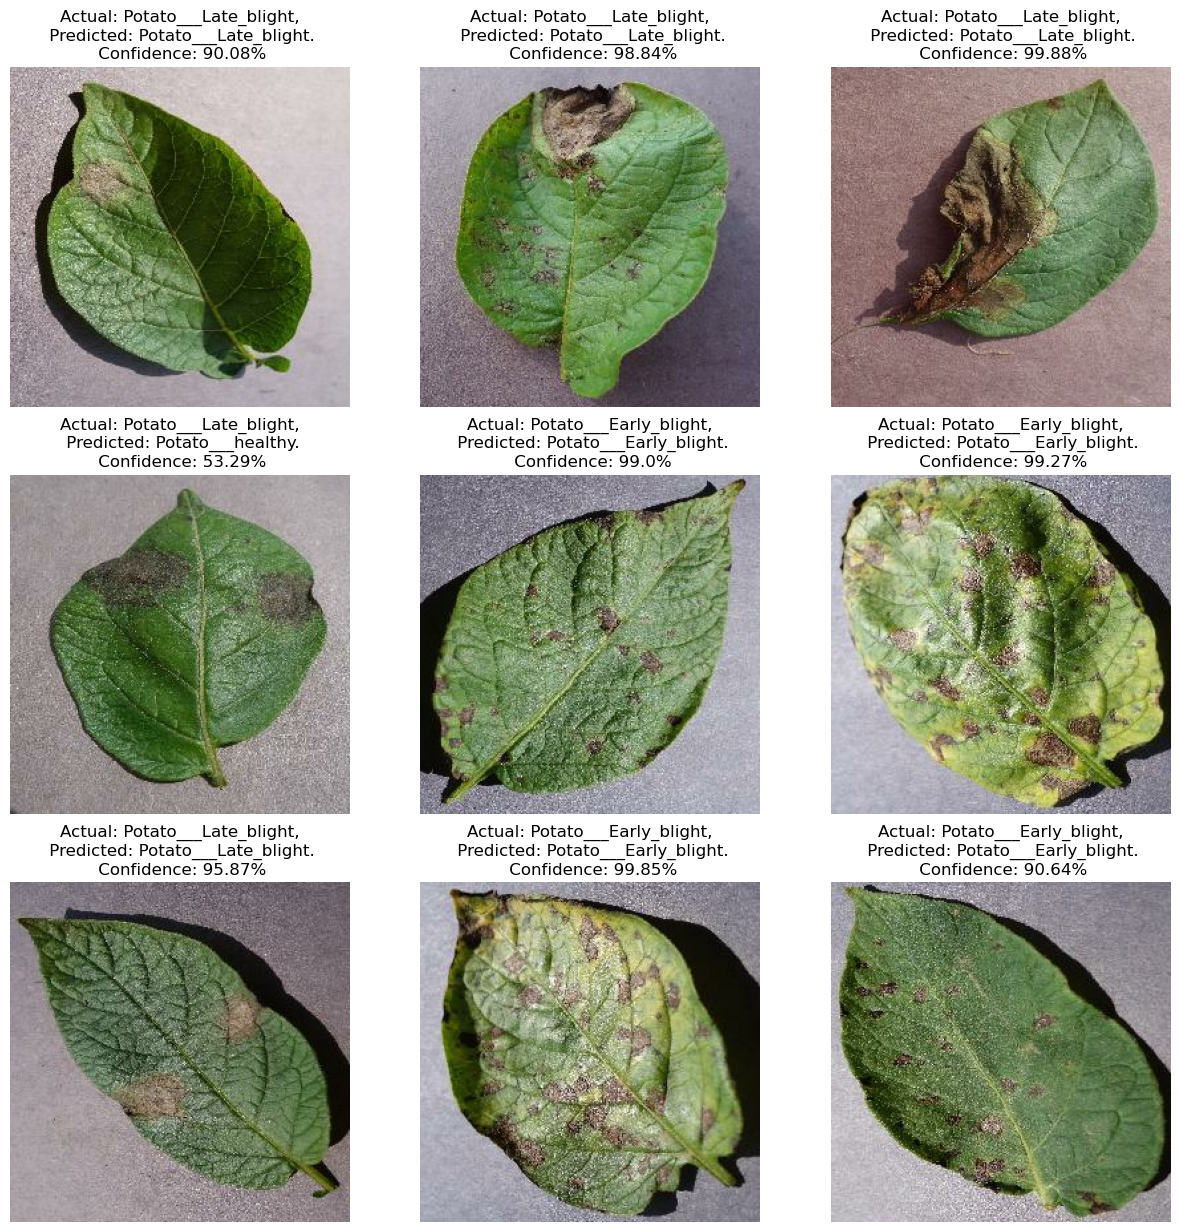

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [46]:
import os

# Define the absolute path to your models directory
models_directory = r"C:\Users\OWNER\Desktop\VICTOR\potatoes project\training\models"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(models_directory):
    os.makedirs(models_directory)

# Now you can save your model to this directory
model_version = max([int(i) for i in os.listdir(models_directory) + [0]]) + 1
model.save(os.path.join(models_directory, str(model_version)))


INFO:tensorflow:Assets written to: C:\Users\OWNER\Desktop\VICTOR\potatoes project\training\models\1\assets


INFO:tensorflow:Assets written to: C:\Users\OWNER\Desktop\VICTOR\potatoes project\training\models\1\assets


In [42]:
model.save("../potatoes.h5")

C:\Users\OWNER\anaconda3\New folder\anaconda__\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
